   #                                          Hands On KMeans Clustering - II

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image

## Loading Data

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### What data says:
There is big mall in specific city that contains information of it's clients.The clients that subscribe to membership card.When the client subscribe to the card they provide information such as their Gender,Age,anda Annual income.Since they have this card they use it buy all sorts of in the mall and therefore the mall has the purchase history each of it's client member and that's how they obtained last column i.e Spending Score.The spending score is decided on number of criteria such as member income, number of times  per week they showed up in mall,and ofcourse the amount of dollars they spent in a year.Based on these parameters spending score ranges (1-100).The closer the score to 1, less spend made by client vise versa.

Now mall company wants to segregate their clients based on two features: Annual Income and Spending Score

This is a typical clustering problem. Lets help poor guys with newly acquired knowledge of K-means clustering.

In [3]:
df.shape

(200, 5)

In [4]:
X = df.iloc[:,[3,4]].values 

## Creating the Clusters

In [5]:
from sklearn.cluster import KMeans

#### Using the elbow method to find optimum number of clusters

In [6]:
wcss = []

In [7]:
for i in range(1,11):
    km = KMeans(n_clusters=i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

As you've noticed, I have set initialization to "k-means++".This is to avoid random initialization trap.
#### What is random initialization trap?
Let's say we have scatter plot which looks something like this…
<img src="C1.1.PNG" width="400" />

If we choose K=3 clusters… we will hope the random initialization would lead us to...following this 3 clusters
<img align="left" src="C1.2.PNG" width="400" /> <img align="right" src="C1.3.PNG" width="400" />
 

But what if we had a bad random initialization?<img src="C1.4.PNG" width="400" />
Green line seperating data points and assigning to each clusters.<img src="C1.5.PNG" width="400" />
This is converged and final model.Look how different clusters came out to be when we initialize with diffrent set of points.That is the curse of random initialization and remedy to that is "[K-means++](https://en.wikipedia.org/wiki/K-means%2B%2B)"

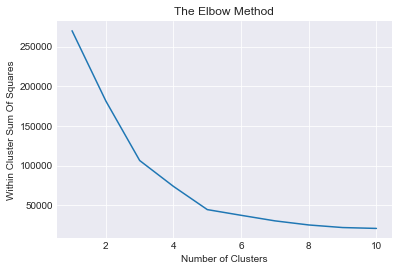

In [8]:
sns.set_style('darkgrid')
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum Of Squares');

As shown in graph , elbow is formed at number 5 on X-axis. That is the optimal number of clusters for this dataset.

***
Alternative to elbow method is.. 

#### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

Where,

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [9]:
from sklearn.metrics import silhouette_score

In [10]:
sse_= []
for k in range(2,8):
    km = KMeans(n_clusters=k,init = 'k-means++',max_iter=300,n_init=10,random_state=0).fit(X)
    sse_.append([k, silhouette_score(X, km.labels_)])

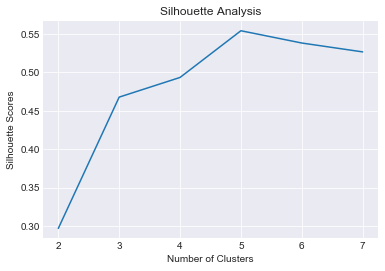

In [11]:
sns.set_style('darkgrid')
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores');

#### Applying K-means to mall dataset

In [12]:
km = KMeans(n_clusters=5,init = 'k-means++',max_iter=300,n_init=10,random_state=0) # setting default values for max_iter and n_init
y_means = km.fit_predict(X)

## Visualizing the Clusters

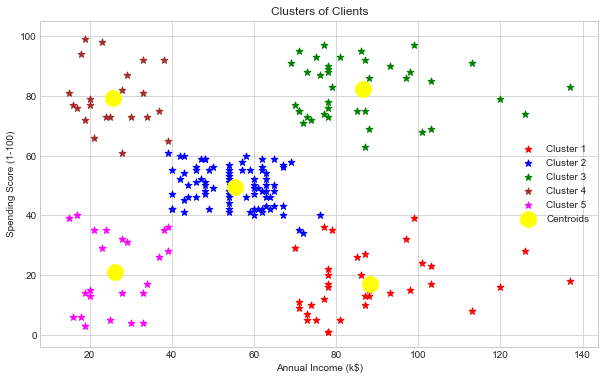

In [13]:
#Plotting scatter plot of clusters along with their highlighted clusters.
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,c='red',label='Cluster 1',marker='*') #X[y_means==0,0] for x-coordinates for cluter1,X[y_means==0,1] for y-coordinates ,s for size of datapoint
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,c='blue',label='Cluster 2',marker='*')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,c='green',label='Cluster 3',marker='*')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50,c='brown',label='Cluster 4',marker='*')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50,c='magenta',label='Cluster 5',marker='*')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='yellow',label='Centroids') #Centroids are highlighted with bigger size

plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();

- Cluster 1 - In this cluster, clients earn High income but don't spend much money.We could call these clients as "__Careful__"
- Cluster 2 - In this cluster, clients earn average income and have average spending score.Let's call them "__Standard__"
- Cluster 3 - In this cluster, clients earn High income and have high spending score.This is main potential customer base for mall's marketing campaigns and it would be very insightful for the mall to understand what kind of product are brought by these set of clients.So we would call this cluster as " __Target__"
- Cluster 4 - In this cluster, clients earn low income but high spending score.Let's call these clients "__Careless__"
- Cluster 5 - In this cluster, clients earn low income and have low spending score.Lets' name them "__Sensible__"

#### We will make these changes in our code...

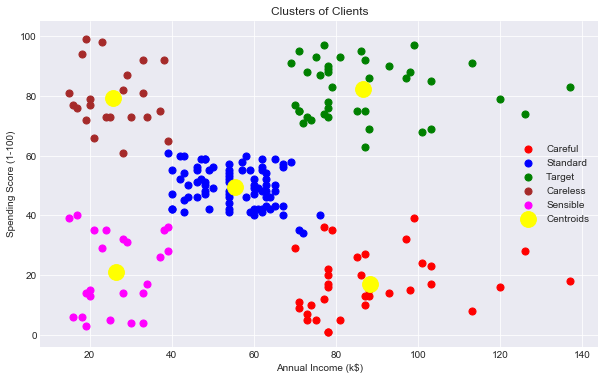

In [14]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=50,c='red',label='Careful')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=50,c='blue',label='Standard')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=50,c='green',label='Target')
plt.scatter(X[y_means==3,0],X[y_means==3,1],s=50,c='brown',label='Careless')
plt.scatter(X[y_means==4,0],X[y_means==4,1],s=50,c='magenta',label='Sensible')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,c='yellow',label='Centroids')

plt.title('Clusters of Clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend();

__Note__ : This code is for two dimentional clustering meaning data with just two variables! 

*** 

[MLXTEND](http://rasbt.github.io/mlxtend/)

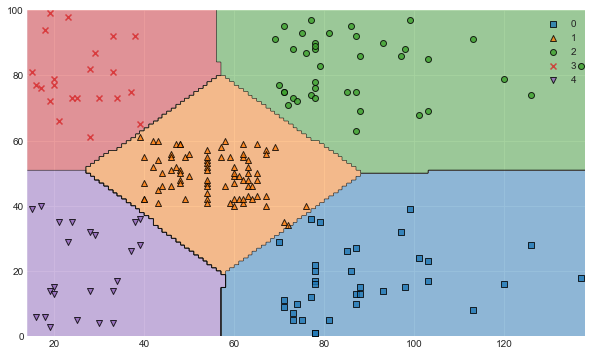

In [15]:
# library supported by Sebastian Raschka for visualizing clusters and many other fuctions
# linear boudries Visualization 
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(10,6))
plot_decision_regions(X,y_means,clf=km);

***